## Задание  
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма: strategy, maxiter, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра.



In [12]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

In [17]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.])

In [36]:
# изменяемый параметр strategy

str_ = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp', 'rand2exp', 'randtobest1bin', 
       'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
values_strategy_nit = []
for strategy in str:
    result = differential_evolution(ackley, bounds, strategy=strategy, seed=42)
    values_strategy_nit.append(result.nit)

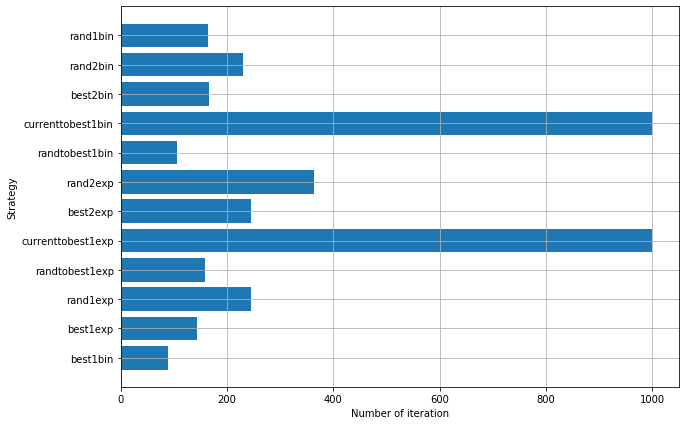

In [46]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(str_, values_strategy_nit)
ax.set(xlabel='Number of iteration', ylabel='Strategy')
plt.grid(True)

Наименьшее количество итераций используется при использовании стратегии best1bin

In [95]:
# изменяемый параметр popsize

values_popsize_nit = []
for popsize in range(0, 101, 5):
    result = differential_evolution(ackley, bounds, popsize=popsize, seed=42)
    values_popsize_nit.append(result.nit)

[Text(0, 0.5, 'Number of iteration'), Text(0.5, 0, 'popsize')]

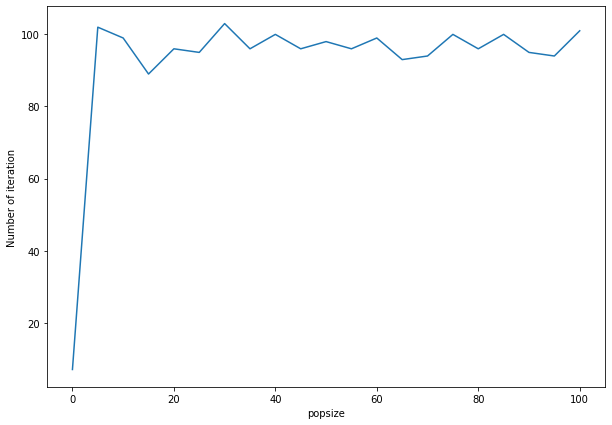

In [98]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(range(0, 101, 5), values_popsize_nit)
ax.set(xlabel='popsize', ylabel='Number of iteration')

Наименьшее значения итераций достигается при значении popsize 15

In [85]:
# изменяемый параметр maxiter

values_maxiter_nit = []
for maxiter in range(101):
    result = differential_evolution(ackley, bounds, maxiter=maxiter, seed=42)
    if result.success is True:
        values_maxiter_nit.append(result.nit)

In [86]:
values_maxiter_nit

[89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89, 89]

При значении параметра maxiter менее 89 результат оптимизации False.  При достижении параметра значения 89 и более, коллечиство итераций фиксируется в значении 89

In [119]:
# изменяемый параметр tol

values_tol_nit = []
for tol in range(101):
    result = differential_evolution(ackley, bounds, tol=tol, seed=42)
    values_tol_nit.append(result.nit)

[Text(0, 0.5, 'Number of iteration'), Text(0.5, 0, 'tol')]

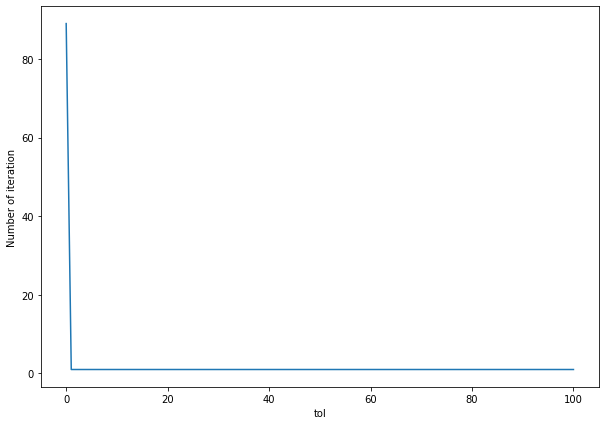

In [128]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(range(101), values_tol_nit)
ax.set(xlabel='tol', ylabel='Number of iteration')

При значении параметра 0 совершается 89 итераций, все остальные значения дают 1 итерацияю

In [155]:
import numpy as np

In [158]:
# изменяемый параметр mutation

values_mutation_nit = []
for mutation in np.arange(0, 2, 0.1):
    result = differential_evolution(ackley, bounds, mutation=mutation, seed=42)
    values_mutation_nit.append(result.nit)

[Text(0, 0.5, 'Number of iteration'), Text(0.5, 0, 'mutation')]

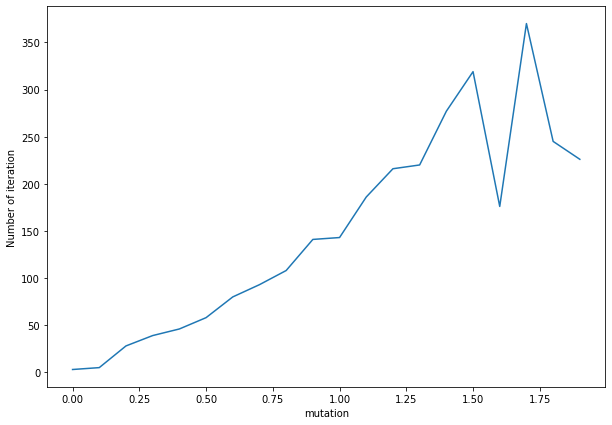

In [160]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(0, 2, 0.1), values_mutation_nit)
ax.set(xlabel='mutation', ylabel='Number of iteration')

In [169]:
# изменяемый параметр recombination

values_recombination_nit = []
for recombination in np.arange(0, 1, 0.1):
    result = differential_evolution(ackley, bounds, recombination=recombination, seed=42)
    values_recombination_nit.append(result.nit)

In [167]:
values_recombination_nit

[1000, 81, 146]

[Text(0, 0.5, 'Number of iteration'), Text(0.5, 0, 'recombination')]

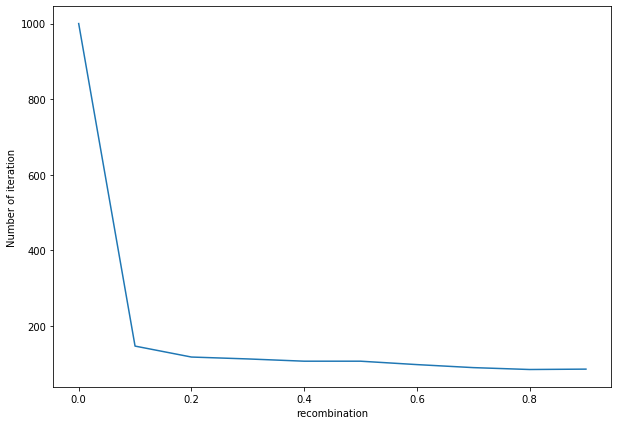

In [171]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(np.arange(0, 1, 0.1), values_recombination_nit)
ax.set(xlabel='recombination', ylabel='Number of iteration')

In [150]:
# изменяемый параметр updating
upd = ['immediate', 'deferred']
values_updating_nit = []
for updating in upd:
    result = differential_evolution(ackley, bounds, updating=updating, seed=42)
    values_updating_nit.append(result.nit)

[Text(0, 0.5, 'updating'), Text(0.5, 0, 'Number of iteration')]

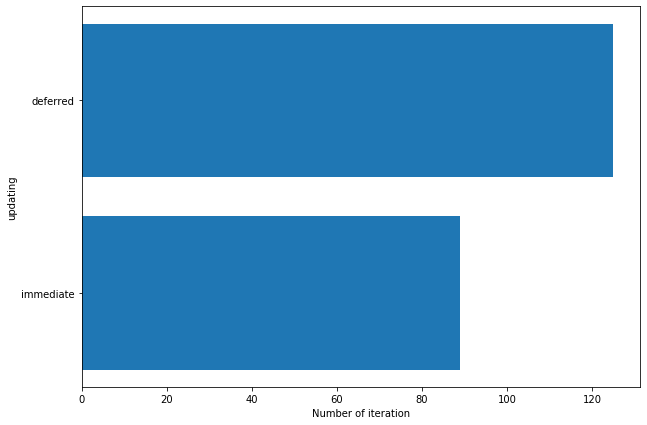

In [153]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.barh(upd, values_updating_nit)
ax.set(xlabel='Number of iteration', ylabel='updating')

При значении параметра immediate  достигается наименьшее число итераций

### Допзадание  
Найти множество параметров (strategy=..., maxiter=..., ..., updating=...), которые требуют минимального количества итераций.

In [172]:
result = differential_evolution(ackley, bounds, strategy='best1bin', maxiter=89, updating='immediate',  seed=42)

In [173]:
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2763
     nit: 89
 success: True
       x: array([0., 0.])